In [1]:
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

In [2]:
path='D:/test_pic/2.jpg'
imag=cv2.imread(path,0)
cv2.imshow('r_imag',imag)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#加噪声
mean = 0
sigma = 0.1
gauss = np.random.normal(mean,sigma,imag.shape)
#给图片添加高斯噪声
image = np.array(imag/255,dtype = float)
image_gaussian = image+gauss

In [4]:
cv2.imshow('image_gaussian',image_gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
def padding_0(img):
    a = np.insert(img, 0, 0, 0)
    b = np.insert(a, 0, 0, 0)
    c = np.insert(b, 0, 0, 1)
    d = np.insert(c, 0, 0, 1)
    h_zeros = np.zeros((d.shape[0], 1))
    e = np.hstack((d, h_zeros))
    f = np.hstack((e, h_zeros))
    w_zeros = np.zeros((1, f.shape[1]))
    g = np.vstack((f, w_zeros))
    img = np.vstack((g, w_zeros))
 
    # no_padding(img)
    return img
#中值滤波 
def middle_flite_pcopy(img):
    img = padding_0(img)
    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            mat = np.array(
                [[img[i - 2, j - 2], img[i - 2, j - 1], img[i - 2, j], img[i - 2, j + 1], img[i - 2, j + 1]],
                 [img[i - 1, j - 2], img[i - 1, j - 1], img[i - 1, j], img[i - 1, j + 1], img[i - 1, j + 1]],
                 [img[i, j - 2], img[i, j - 1], img[i, j], img[i, j + 1], img[i, j + 1]],
                 [img[i + 1, j - 2], img[i + 1, j - 1], img[i + 1, j], img[i + 1, j + 1], img[i + 1, j + 1]],
                 [img[i + 2, j - 2], img[i + 2, j - 1], img[i + 2, j], img[i + 2, j + 1], img[i + 2, j + 1]]])
            c = list(chain(*mat))
            sort_list = sorted(c)
            img[i, j] = sort_list[12]
    return img
#均值滤波
def mean_fliter(img):
    img=padding_0(img)
    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            mat = np.array(
                [[img[i - 2, j - 2], img[i - 2, j - 1], img[i - 2, j], img[i - 2, j + 1], img[i - 2, j + 1]],
                 [img[i - 1, j - 2], img[i - 1, j - 1], img[i - 1, j], img[i - 1, j + 1], img[i - 1, j + 1]],
                 [img[i, j - 2], img[i, j - 1], img[i, j], img[i, j + 1], img[i, j + 1]],
                 [img[i + 1, j - 2], img[i + 1, j - 1], img[i + 1, j], img[i + 1, j + 1], img[i + 1, j + 1]],
                 [img[i + 2, j - 2], img[i + 2, j - 1], img[i + 2, j], img[i + 2, j + 1], img[i + 2, j + 1]]])
            mean = np.sum(mat) / 25
            img[i, j] = mean
    return img
#高斯滤波
def gaussian_filter(img, K_size=3, sigma=1.3):
    if len(img.shape) == 3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape

    ## Zero padding
    pad = K_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
    ## prepare Kernel
    K = np.zeros((K_size, K_size), dtype=np.float)
    for x in range(-pad, -pad + K_size):
        for y in range(-pad, -pad + K_size):
            K[y + pad, x + pad] = np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * sigma * sigma)
    K /= K.sum()
    tmp = out.copy()
    
    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + K_size, x: x + K_size, c])
    out = np.clip(out, 0, 255)
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)
    return out

In [6]:
#中值滤波
middle_filter_imag = middle_flite_pcopy(imag/255)
cv2.imshow('middle_filter_imag',middle_filter_imag)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

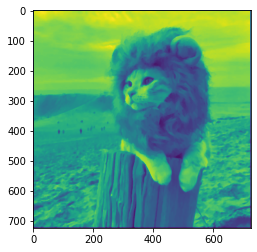

In [7]:
plt.imshow(middle_filter_imag)
plt.show

In [8]:
#均值滤波
mean_filter_imag = mean_fliter(imag/255)
cv2.imshow('mean_filter_imag',mean_filter_imag)
cv2.waitKey(0)
cv2.destroyAllWindows()

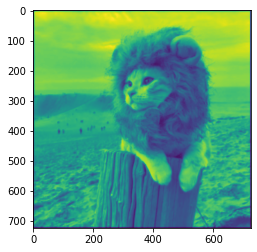

In [9]:
plt.imshow(mean_filter_imag)
plt.show()

In [10]:
#最大最小值滤波
import math
import copy
def spilt( a ):
    if a%2 == 0:
        x1 = x2 = a/2
    else:
        x1 = math.floor( a/2 )
        x2 = a - x1
    return -x1,x2

def original (i, j, k,a, b,img):
    x1, x2 = spilt(a)
    y1, y2 = spilt(b)
    temp = np.zeros(a * b)
    count = 0
    for m in range(x1, x2):
        for n in range(y1, y2):
            if i + m < 0 or i + m > img.shape[0] - 1 or j + n < 0 or j + n > img.shape[1] - 1:
                temp[count] = img[i, j, k]
            else:
                temp[count] = img[i + m, j + n, k]
            count += 1
    return  temp 
    


#最大值滤波
def max_functin(a, b, img):
    img0 = copy.copy(img)
    for i in range(0, img.shape[0]):
        for j in range(2, img.shape[1]):
            for k in range(img.shape[2]):
                temp = original(i, j, k, a, b, img0)
                img[i, j, k] = np.max(temp)
    return img

#最小值滤波
def min_functin(a, b, img):
    img0 = copy.copy(img)
    for i in range(0, img.shape[0]):
        for j in range(2, img.shape[1]):
            for k in range(img.shape[2]):
                temp = original(i, j, k, a, b, img0)
                img[i, j, k] = np.min(temp)
    return img

In [11]:
img0 = cv2.imread("D:/test_pic/2.jpg")

max_img = max_functin(3, 3, copy.copy(img0))
min_img = min_functin(3, 3, copy.copy(img0))

cv2.imshow("max_img",max_img)
cv2.imshow("min_img",min_img)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

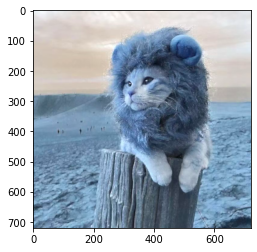

In [12]:
plt.imshow(max_img)
plt.show()

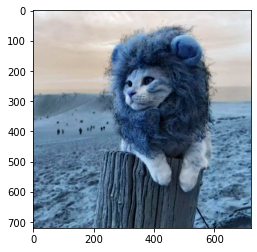

In [13]:
plt.imshow(min_img)
plt.show()

In [14]:
#导向图滤波
def guidedFilter(I, p, winSize, eps):
    # 输入图像的高，宽
    rows, cols = I.shape
    # I的均值平滑
    mean_I = cv2.blur(I, winSize, borderType=cv2.BORDER_DEFAULT)
    # p的均值平滑
    mean_p = cv2.blur(p, winSize, borderType=cv2.BORDER_DEFAULT)
    # I .* p 的均值平滑
    Ip = I * p
    mean_Ip = cv2.blur(Ip, winSize, borderType=cv2.BORDER_DEFAULT)
    # 协方差
    cov_Ip = mean_Ip - mean_I * mean_p
    mean_II = cv2.blur(I*I, winSize, borderType=cv2.BORDER_DEFAULT)
    # 方差
    var_I = mean_II - mean_I * mean_I
    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I
    # 对a和b进行均值平滑
    mean_a = cv2.blur(a, winSize, borderType=cv2.BORDER_DEFAULT)
    mean_b = cv2.blur(b, winSize, borderType=cv2.BORDER_DEFAULT)
    q = mean_a * I + mean_b
    return b

In [15]:
image_0_1 = imag / 255.0
result = guidedFilter(image_0_1, image_0_1, (9, 9), math.pow(0.2, 2.0))
cv2.imshow('guidedFilter', result)

cv2.waitKey(0)
cv2.destroyAllWindows()

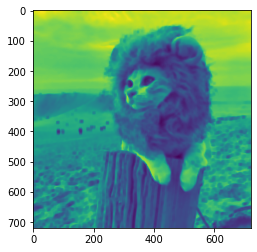

In [21]:

plt.imshow(result)
plt.show()

In [17]:
#双边滤波
import scipy 
import random
def getClosenessWeight(sigma_g,H,W):
    r,c=np.mgrid[0:H:1,0:W:1]
    r -= (H - 1) // 2
    c -= int(W - 1) // 2
    closeWeight=np.exp(-0.5*(np.power(r,2)+np.power(c,2))/math.pow(sigma_g,2))
    return closeWeight

def bfltGray(I,H,W,sigma_g,sigma_d):
    #构建空间距离权重模板
    closenessWeight=getClosenessWeight(sigma_g,H,W)
    #模板的中心点位置
    cH = (H - 1) // 2 #//表示整数除法
    cW = (W - 1) // 2
    #图像矩阵的行数和列数
    rows,cols=I.shape
    #双边滤波后的结果
    bfltGrayImage=np.zeros(I.shape,np.float32)
    for r in range(rows):
        for c in range(cols):
            pixel=I[r][c]
            #判断边界
            rTop=0 if r-cH<0 else r-cH
            rBottom=rows-1 if r+cH>rows-1 else r+cH
            cLeft=0 if c-cW<0 else c-cW
            cRight=cols-1 if c+cW>cols-1 else c+cW
            # 权重模板作用的区域
            region=I[rTop:rBottom+1,cLeft:cRight+1]
            #构建灰度值相似性的权重因子
            similarityWeightTemp=np.exp(-0.5*np.power(region-pixel,2.0)/math.pow(sigma_d,2))
            #similarityWeightTemp = np.exp(-0.5 * np.power(region - pixel, 2.0) / math.pow(sigma_d, 2))
            closenessWeightTemp=closenessWeight[rTop-r+cH:rBottom-r+cH+1,cLeft-c+cW:cRight-c+cW+1]
            #两个权重模板相乘
            weightTemp=similarityWeightTemp*closenessWeightTemp
            #归一化权重模板
            weightTemp=weightTemp/np.sum(weightTemp)
            #权重模板和对应的领域值相乘求和
            bfltGrayImage[r][c]=np.sum(region*weightTemp)
    return bfltGrayImage

In [18]:
a= cv2.imread(r"D:/test_pic/2.jpg", cv2.IMREAD_UNCHANGED) 
image1 = cv2.split(a)[0]#蓝通道
cv2.imshow("Origin",image1)
image1=image1/255.0
    #双边滤波
bfltImage=bfltGray(image1,3,3,19,0.2)
cv2.imshow("BilateralFilter",bfltImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

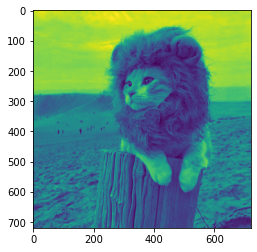

In [19]:
plt.imshow(bfltImage)
plt.show()